In [27]:
import pandas as pd
from tqdm import tqdm
from pyarrow import csv
import pyarrow as pa

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from catboost import CatBoostClassifier
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve

import pandas as pd
from tqdm import tqdm
from pyarrow import csv
import pyarrow as pa

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from catboost import CatBoostClassifier
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [28]:
import pickle

def load(filename):
    f = open(filename, 'rb')
    res = pickle.load(f)
    f.close()
    return res

In [29]:
y_test = load('y_test')

In [30]:
y_pred_arr = []
for i in range(80):
    y_pred_arr.append(load("y_pred_0+"+str(i)))

In [31]:
y_pred = y_pred_arr[0]

In [32]:
y_pred = y_pred.detach().cpu().numpy()

In [43]:
np.any(y_pred.reshape(-1,) == 1)

False

In [34]:
torch.Tensor(y_pred).shape

torch.Size([10000, 1])

In [35]:
for tensor in y_pred_arr[1:]:
    y_pred = np.concatenate((y_pred, tensor.detach().cpu().numpy()), axis=0)

In [36]:
y_pred.shape

(746167, 1)

In [18]:
y_test 

1856763    0
712274     0
1483074    0
101751     0
1853696    0
          ..
2442436    0
1149877    0
675851     0
876316     0
1791289    0
Name: Label, Length: 746167, dtype: int64

In [19]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc *= 100
    
    return acc

In [20]:
torch.Tensor(np.array(y_test)).unsqueeze(1)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [21]:
binary_acc(torch.Tensor(y_pred), torch.Tensor(np.array(y_test)).unsqueeze(1))

tensor(99.5480)

In [22]:
y_predict = torch.round(torch.sigmoid(torch.Tensor(y_pred))).numpy().reshape(-1, )

In [23]:
y_true = np.array(y_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
tn, fp, fn, tp = confusion_matrix(y_true, y_predict).ravel()

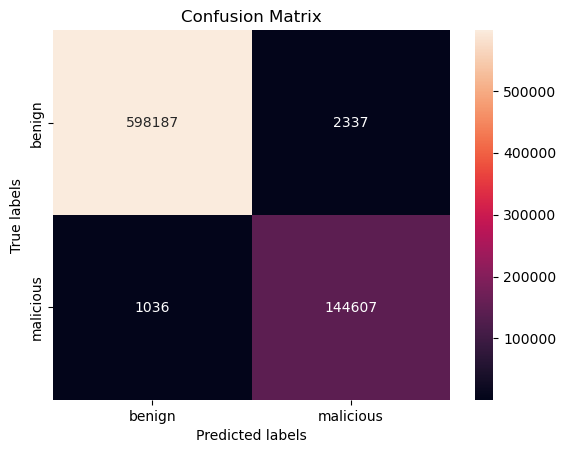

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap([[tn, fp],[fn, tp]], annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['benign', 'malicious']); ax.yaxis.set_ticklabels(['benign', 'malicious']);

In [6]:
class modelDNN(nn.Module):
    def __init__(self):
        super(modelDNN, self).__init__()        
        self.layer_1 = nn.Linear(111, 4096) 
        self.layer_2 = nn.Linear(4096, 2048)
        self.layer_3 = nn.Linear(2048, 1024) 
        self.layer_4 = nn.Linear(1024, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(4096)
        self.batchnorm2 = nn.BatchNorm1d(2048)
        self.batchnorm3 = nn.BatchNorm1d(1024)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_4(x)
        
        return x

In [7]:
model = torch.load("TabularCNN.torch")
model.eval()

modelDNN(
  (layer_1): Linear(in_features=111, out_features=4096, bias=True)
  (layer_2): Linear(in_features=4096, out_features=2048, bias=True)
  (layer_3): Linear(in_features=2048, out_features=1024, bias=True)
  (layer_4): Linear(in_features=1024, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)